# Image search

## Imports

In [24]:
from lab3lib import load_data, show_single_face, show_faces, partition_data, split_left_right, join_left_right, show_split_faces
import numpy as np
import matplotlib.pyplot as pl

## Loading data

In [25]:
data, labels = load_data()

## Splitting into the train and test sets

In [26]:
# normalization
data = data / 255

#partition
train_inds, test_inds = partition_data(labels,3)
train_data, test_data = data[train_inds], data[test_inds]
print(type(train_data[0]))

<class 'numpy.ndarray'>


## Dataset visualization

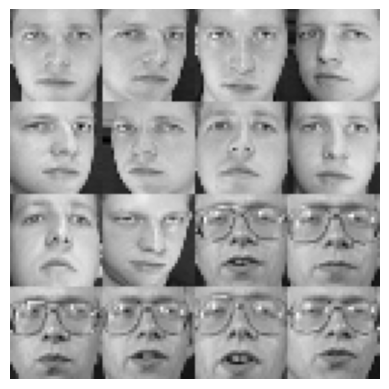

In [27]:
show_faces(data[:16], num_per_row = 4)

## Euclidean distance

In [28]:
def euclidean_distance(vec1, vec2) :
    ret = np.sqrt(np.sum((vec1[j] - vec2[j])**2 for j in range(1024)))
    return ret

## Cosine similarity

In [29]:
def cosine_similarity(vec1, vec2) :
    numerator = np.sum(vec1[j] * vec2[j] for j in range(1024))
    denominator1 = np.sum(vec1[j] * vec1[j] for j in range(1024)) ** 0.5
    denominator2 = np.sum(vec2[j] * vec2[j] for j in range(1024)) ** 0.5
    return numerator / (denominator1 * denominator2)

In [30]:
def cosine_distance(vec1, vec2):
    return 1 - cosine_similarity(vec1, vec2)

## Search

In [31]:
def search_euclidean(dataset, image, k, is_included) -> list[int]:
    result: list[tuple[float, int]] = []
    for i in range(len(dataset)) :
        result.append((euclidean_distance(image, dataset[i]),i))
    result.sort()
    if(is_included) :
        return result[1:k+1]
    else :
        return result[:k]

In [32]:
def search_cosine(dataset, image, k, is_included) -> list[int]:
    result: list[tuple[float, int]] = []
    for i in range(len(dataset)) :
        result.append((cosine_distance(image, dataset[i]),i))
    result.sort()
    if(is_included) :
        return result[1:k+1]
    else :
        return result[:k]

## Visualization

/tmp/ipykernel_4223/2761021671.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  ret = np.sqrt(np.sum((vec1[j] - vec2[j])**2 for j in range(1024)))


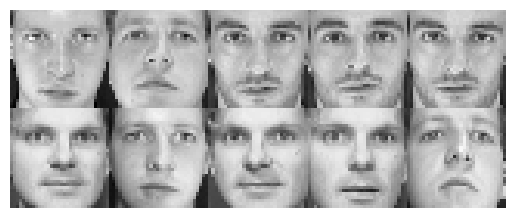

In [33]:
image = data[0]
result = search_euclidean(data, image, 10, 1)

idx = [r[1] for r in result]

show_faces(data[idx], num_per_row=5)

/tmp/ipykernel_4223/1267488854.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  numerator = np.sum(vec1[j] * vec2[j] for j in range(1024))
/tmp/ipykernel_4223/1267488854.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  denominator1 = np.sum(vec1[j] * vec1[j] for j in range(1024)) ** 0.5
/tmp/ipykernel_4223/1267488854.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  denominator2 = np.sum(vec2[j] * vec2[j] for j in range(1024)) ** 0.5


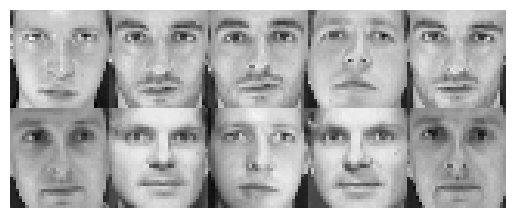

In [34]:
result = search_cosine(data, image, 10, 1)

idx = [r[1] for r in result]

show_faces(data[idx], num_per_row=5)

## Testing 

In [35]:
def test(k) :
    true_pred = 0
    for i in range(len(test_data)) :
        sample = test_inds[i] // 10
        result = search_cosine(train_data, test_data[i], k, 0)
        for j in range(k) :
            if train_inds[result[j][1]] // 10 == sample :
                true_pred = true_pred + 1
    return true_pred / (k * len(test_data))


In [36]:
test(2)

/tmp/ipykernel_4223/1267488854.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  numerator = np.sum(vec1[j] * vec2[j] for j in range(1024))
/tmp/ipykernel_4223/1267488854.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  denominator1 = np.sum(vec1[j] * vec1[j] for j in range(1024)) ** 0.5
/tmp/ipykernel_4223/1267488854.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  denominator2 = np.sum(vec2[j] * vec2[j] for j in range(1024)) ** 0.5


0.65